In [1]:
import sys
sys.path.append('../')

import numpy as np

In [2]:
from src.mechanism.single_item import SingleItemAuction
from src.game import Game
from src.strategy import Strategy
from src.learner import SODA

In [3]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1':[0, 2.0]}
a_space = {'1':[0, 1.5]}
param_prior = {
    'distribution': 'affiliated_values'
}
param_util = {
    'payment_rule': 'first_price',
    'tie_breaking': 'lose'
}


# parameter approximation game
n = 64
m = 64

# parameter learner
max_iter = int(2e3)
tol = 1e-5
steprule_bool = True
eta = 20
beta = 1/20

In [4]:
# create mechanism
mechanism = SingleItemAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

# create learner
soda = SODA(max_iter, tol, steprule_bool, eta, beta)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

In [5]:
# run soda
soda.run(mechanism, game, strategies)

100%|████████████████████| 2.00k/2.00k [00:41<00:00, 48.6it/s]

No convergence
Current relative utility loss 0.008 %
Best relative utility loss 0.008 %


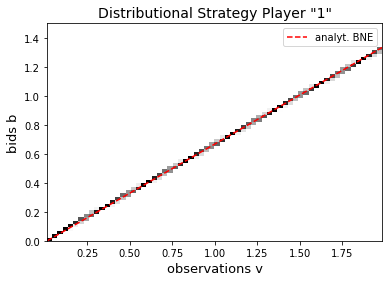

In [6]:
x = np.linspace(0,2, 100)
strategies['1'].plot(beta=2/3*x)

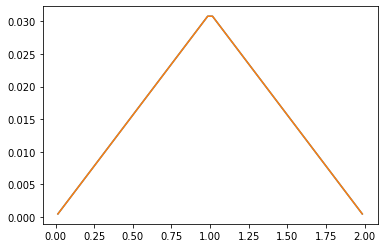

In [8]:
plt.plot(strategies['1'].o_discr, strategies['1'].margin())
plt.plot(strategies['1'].o_discr, strategies['1'].prior)

0.06101190476190477

In [40]:
soda.indices

{'1': 'abAB,Bb,AB->Aa'}